<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana9/DescensoGraidienteSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [26]:

def Plotter(e):

  fig = plt.figure(figsize=(6,3))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)

  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax,ax1

In [27]:
# Definamos el sistema usando una lista
G = (lambda x,y,z: 3*x - np.cos(y*z) - 1.5, \
     lambda x,y,z: 4*x**2 - 625*y**2 + 2*y -1, \
     lambda x,y,z: np.exp(-x*y) + 20*z + 9.471975)

In [28]:
G1=(lambda x,y,z: 3*x - y - z - 1., \
    lambda x,y,z: -x + 3*y + z - 3., \
    lambda x,y,z: 2*x + y + 4*z - 7.)

In [29]:
def GetF(G,r):

  n = r.shape[0]
  v = np.zeros(n)

  for i in range(n):
    v[i] = G[i](*r)

  return v

In [30]:
GetF(G1,np.array([0.,10.,0.]))

array([-11.,  27.,   3.])

In [31]:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetF(G,r))

In [32]:
Metric(G1,np.array([0.,5.,3.]))

np.float64(10.074720839804943)

In [33]:
def GetJacobian(f,r,h=1e-3):

  n = r.shape[0]

  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):

      rf = r.copy()
      rb = r.copy()

      rf[j] = rf[j] + h
      rb[j] = rb[j] - h

      J[i,j] = (f[i](*rf) - f[i](*rb))/(2*h)

  return J

In [35]:
J = GetJacobian(G1,np.array([0.,0.,1.]))
J

array([[ 3., -1., -1.],
       [-1.,  3.,  1.],
       [ 2.,  1.,  4.]])

In [45]:
def Minimizer(G,r,lr=1e-4,epochs=int(1e4),error=1e-3):

  metric = 1
  it = 0

  M = np.array([])
  history = np.array([r])

  while metric > error and it < epochs:

    M = np.append(M,Metric(G,r))

    J = GetJacobian(G,r)
    Vector = GetF(G,r)

    # Algoritmo
    r = r - lr*np.dot(J.T,Vector)

    history = np.vstack((history,r))

    metric = Metric(G,r)

    if it % 100 == 0:
      clear_output(wait=True)
      _,ax,ax1 = Plotter(it)
      ax.plot(history[:it])
      ax1.plot(M[:it],color='k',label='Metric {:.3f}'.format(M[-1]))
      ax1.legend()

      plt.show()

      time.sleep(0.1)

    it += 1

  return r

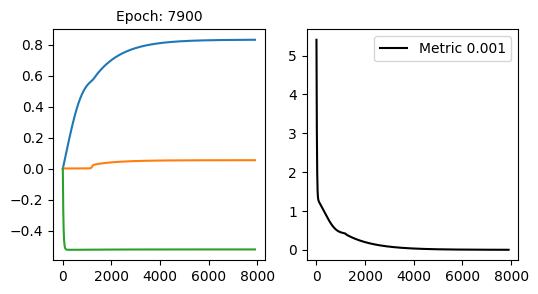

In [46]:
xsol = Minimizer(G,np.array([0.,0.,0.]))

In [47]:
xsol

array([ 0.83253079,  0.05487696, -0.52136592])

In [49]:
GetF(G,xsol)

array([-1.99836946e-03,  8.51317961e-06, -2.16657801e-06])